In [ ]:
!sudo apt-get install -y fonts-nanum # 한글로 바꾸는 것을 설치하는 코딩이다. 지금 실행이 잘 안되서 혹시 다른 컴퓨터에는 작동이 잘 될지를 몰라서 넣어 보았다. 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
%matplotlib inline
import pandas as pd # pandas이다. 데이터를 표로 만드는 모듈이다.
import numpy as np # numpy이다. 행렬 식으로 만드는 모듈이다.
import matplotlib.pyplot as plt #matplotlib이다. 그래프를 시각화해서 나타내는 모듈이다. 
plt.rc('font',family='NanumBarunGothic') # 한글로 바꾸는 코딩이다. 지금 실행이 잘 안되서 혹시 다른 컴퓨터에는 작동이 잘 될지를 몰라서 넣어 보았다. 

data= pd.read_csv("최영준_심박수 (2).csv") # 최영준 심박수의 폴더이다. 이것은 엑셀 파일을 작동시키는 코드이다. 
data.rename(columns={"시간":"time"},inplace=True) # 이것들도 삭제가 가능하다. 작동이 안된다면 코드 맨 앞 줄에 '#'를 삽입시켜 코드를 작동하기 바란다. '시간'이라는 열을 'time'이라는 열로 바꾼 코드이다.
data.rename(columns={"심박수":"heartrate"},inplace=True) 
data.rename(columns={"졸음 여부":"drowneiss"},inplace=True)
print(data)

                  time  heartrate drowneiss
0     2021-11-23 14:10        107       평상시
1     2021-11-23 14:00        109       평상시
2     2021-11-23 13:50        117       평상시
3     2021-11-23 13:40        111       평상시
4     2021-11-23 13:31         61        졸음
...                ...        ...       ...
2717   2021-08-25 3:40         58        졸음
2718   2021-08-25 2:50         63        졸음
2719   2021-08-25 1:50         64        졸음
2720  2021-08-25 12:41         72     졸음 의심
2721  2021-08-24 21:31         83       평상시

[2722 rows x 3 columns]


In [ ]:
from statsmodels.tsa.arima_model import ARIMA# arima 모델 생성코드
import statsmodels.api as sm

model=ARIMA(data.heartrate.values, order=(2,1,5))# p값과 q값은 곱이 0이 포함되어있고, 짝수 값이 나오는 것이 좋다. 따라서 10값을 포함했다. order=(p,d(차분),q) 
#차분이란 1차분과 2차분으로 구성되어있다. p값과 q 값은 각각 AR모델을 몇 개 사용할 것인지, MA 모델을 몇 개 사용할 것인지를 나타내는 값이다.  
model_fit=model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2721
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -10880.106
Method:                       css-mle   S.D. of innovations             13.186
Date:                Mon, 13 Dec 2021   AIC                          21778.212
Time:                        11:43:24   BIC                          21831.391
Sample:                             1   HQIC                         21797.436
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.005     -0.041      0.968      -0.010       0.010
ar.L1.D.y     -0.0504      0.178     -0.283      0.777      -0.400       0.299
ar.L2.D.y      0.8064      0.154      5.228      0.0

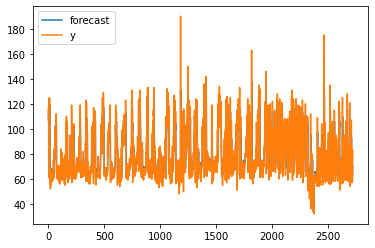

In [ ]:
fig=model_fit.plot_predict() #model을 예측하는 것이다. 예측값과 실제값이 그래프상으로 봤을 때는 차이가 안 나는 것을 볼 수 있다.

# plt.legend(['예측 값', '실제 값']) # 혹시 한글 코딩이 잘 된다면 사용 부탁드린다. 

              0
0      2.000204
1      8.707091
2     -2.403906
3    -50.886183
4     37.439803
...         ...
2716  -6.660230
2717   0.587130
2718  -0.526314
2719   6.618226
2720  12.615639

[2721 rows x 1 columns]


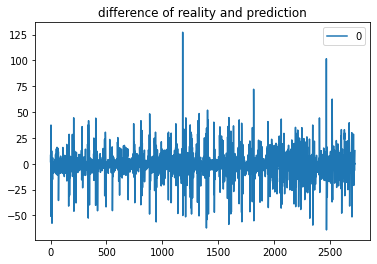

In [ ]:
residuals=pd.DataFrame(model_fit.resid) #model_fit.resid는 실제값과 예측값의 크기를 나타내는 함수이고, pd.DataFrame은 데이터를 표로 나타내는 함수이다. 
print(residuals) #실제값과 예측값의 차이이다. index의 절댓값이 크면 클수록 실제값과 예측값의 차이가 많이 나는 것이다.
residuals.plot(title="difference of reality and prediction")# 실제값과 예측값의 차이
#residuals.plot(title="실제 값과 예측 값의 차이") # 혹시 한글 코딩이 잘 된다면 사용 부탁드린다.
# 실제값과 예측값의 차이를 살펴본다면 위에있는 그래프보다도 실제값과 예측값의 차이가 두드러지는 것을 볼 수 있다. 

In [ ]:
forecast_data=model_fit.forecast(steps=10)  #train 모델에서 가장 끝 쪽 10개의 추출데이터를 예측한다. (steps는 예측으로 보여줄 갯수이다. 예를 들어, steps가 10이면 10개의 데이터를 추출한다.
# steps의 크기가 작을 수록 정확한 예측을 할 수 있다. )                   

In [ ]:
pred_arima_y= forecast_data[0].tolist()

test_y= data.heartrate.values #
test_y=test_y[2712:] # test 데이터 에서 10개 데이터를 맞추기 위해 맨 끝 10개의 실제 값을 뽑아낸다. . 
pred_y_lower=[] # 예측의 최저값
pred_y_upper=[] #예측의 최고값

for lower_upper in forecast_data[2]:
  lower=lower_upper[0]
  upper=lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)
print(pred_arima_y)

[77.62525296763066, 77.97602635621104, 77.86737597183439, 77.77958546784551, 77.48490979882422, 77.42890831790689, 77.19404973721275, 77.16067013977559, 76.97290919968921, 76.95539971337173]


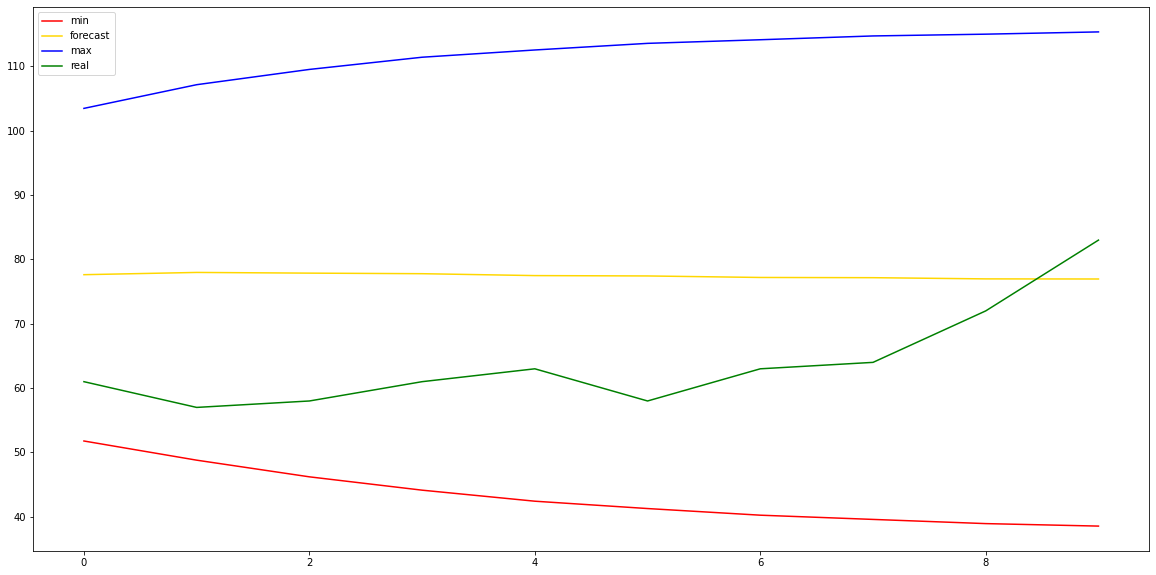

In [ ]:
plt.figure(figsize=(20,10)) # 그래프의 사이즈 크기(네모값)
plt.plot(pred_y_lower, color='red') # 모델 예측의 최저값
plt.plot(pred_arima_y, color='gold') # 모델 예측값
plt.plot(pred_y_upper,color='blue') #모델 예측의 최고값
plt.plot(test_y,color='green') #test의 실제값

plt.legend(['min','forecast','max','real']) #범주 값
#plt.legend(['최소값','예측값','최대값','실제값']) # 혹시 한글 코딩이 잘 된다면 사용 부탁드린다

In [ ]:
for prediction in pred_arima_y: # prediction으로 arima의 y값 중에서 1사분위수 65이면 졸음 값, 73미만이면 졸음 의심, 96 미만이면 평상시, 96이상이면 심박수 높음으로 규정한다. 
  if prediction < 65: #지금 데이터가 많이 쌓여있지 않아서 모두 평상시 값으로 나왔으니 참고부탁드립니다. 
    print('졸음')
  elif prediction <73:
    print('졸음 의심')
  elif prediction<96:
    print('평상시')
  else :
    print('심박수 높음') 

평상시
평상시
평상시
평상시
평상시
평상시
평상시
평상시
평상시
평상시
